# Load Dataset

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
df = pd.read_excel(r"Datasets/usefile.xlsx")
df

,Gender Index,Age,Hypertension,Heart Disease,Martial Status,Work Type Index,Residence Type,Average Glucose Level,BMI,Smoking Status Index,Stroke
0,0,3.0,0,0,0,0,0,95.12,18.0,0,0
1,0,58.0,1,0,1,2,1,87.96,39.2,0,0
2,1,8.0,0,0,0,2,1,110.89,17.6,0,0
3,1,70.0,0,0,1,2,0,69.04,35.9,1,0
4,1,47.0,0,0,1,2,1,210.95,50.1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,1,10.0,0,0,0,0,1,58.64,20.4,0,0
43396,1,56.0,0,0,1,4,1,213.61,55.4,1,0
43397,1,82.0,1,0,1,2,1,91.94,28.9,1,0
43398,0,40.0,0,0,1,2,1,99.16,33.2,0,0


<AxesSubplot:>

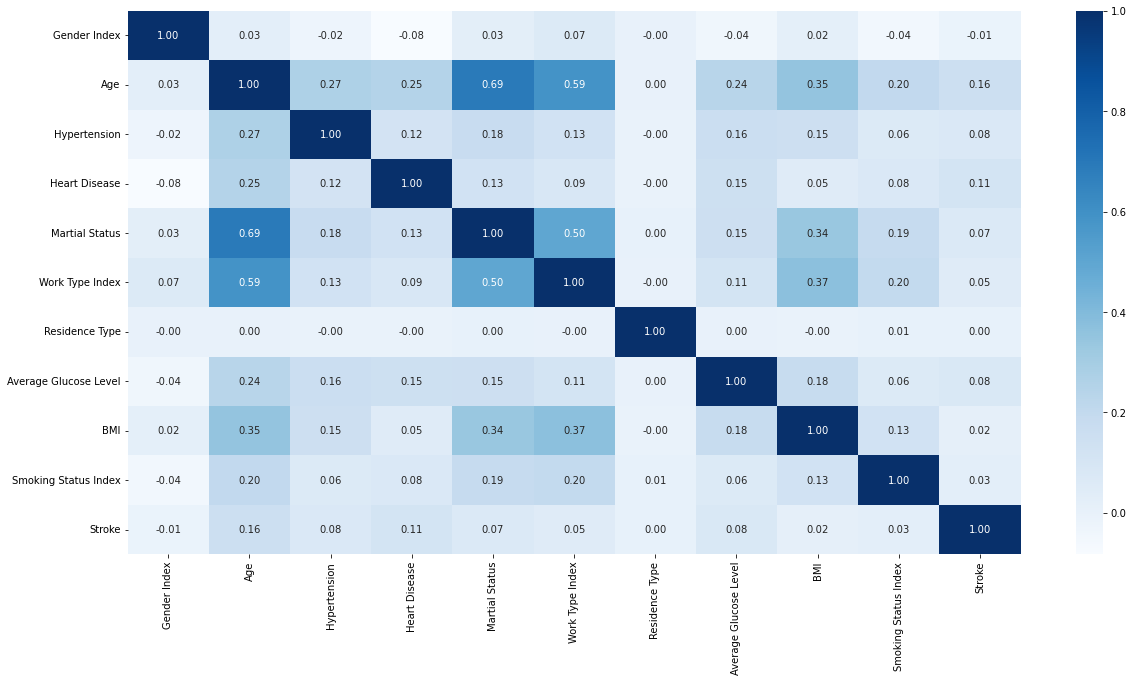

In [3]:
plt.rcParams['figure.figsize'] = (20,10)
sns.heatmap(data=df.corr(),annot=True,fmt='.2f',cmap='Blues')

In [4]:
df.shape

(43400, 11)

In [5]:
df.head(10)

,Gender Index,Age,Hypertension,Heart Disease,Martial Status,Work Type Index,Residence Type,Average Glucose Level,BMI,Smoking Status Index,Stroke
0,0,3.0,0,0,0,0,0,95.12,18.0,0,0
1,0,58.0,1,0,1,2,1,87.96,39.2,0,0
2,1,8.0,0,0,0,2,1,110.89,17.6,0,0
3,1,70.0,0,0,1,2,0,69.04,35.9,1,0
4,1,47.0,0,0,1,2,1,210.95,50.1,0,0
5,0,14.0,0,0,0,1,0,161.28,19.1,0,0
6,1,52.0,0,0,1,2,1,77.59,17.7,1,0
7,1,75.0,0,1,1,3,0,243.53,27.0,0,0
8,1,32.0,0,0,1,2,0,77.67,32.3,2,0
9,1,74.0,1,0,1,3,1,205.84,54.6,0,0


In [6]:
X = df.drop('Stroke',axis=1)
y = df['Stroke']

# _Spliting the dataset into train and test dataset_

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [11]:
X_train

array([[ 0.82969259,  1.32213599, -0.3222331 , ..., -0.71882026,
        -0.6875417 ,  0.71218423],
       [ 0.82969259, -0.93854822, -0.3222331 , ..., -0.39099967,
        -1.41014335, -0.63806076],
       [-1.20239874,  1.5437717 , -0.3222331 , ..., -0.90813491,
        -0.10946038,  0.71218423],
       ...,
       [ 0.82969259,  1.76540741, -0.3222331 , ..., -1.04803287,
        -0.63498885,  0.71218423],
       [-1.20239874,  0.56857459, -0.3222331 , ..., -0.03255466,
         1.19122259, -0.63806076],
       [ 0.82969259,  1.36646313,  3.10334351, ..., -0.85895022,
         0.56058843,  0.71218423]])

In [12]:
X_test

array([[ 0.82889999,  1.77139637, -0.3175285 , ..., -0.97004291,
         0.39483603, -0.64540635],
       [-1.20526793,  1.1899273 , -0.3175285 , ..., -0.66408654,
         0.70452884, -0.64540635],
       [ 0.82889999, -0.95703543, -0.3175285 , ..., -0.24640975,
         0.4851631 ,  2.01593669],
       ...,
       [-1.20526793, -0.42029475,  3.14932358, ..., -0.45617529,
         0.4851631 , -0.64540635],
       [-1.20526793, -1.00176382, -0.3175285 , ..., -0.88428241,
        -0.572954  , -0.64540635],
       [-1.20526793,  0.29535949,  3.14932358, ..., -0.57577641,
         1.67231888, -0.64540635]])

In [13]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay

# Initializing ANN

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.metrics import AUC

In [15]:
#10 - 16 - 16 - 1
ann_model = Sequential()

#1st Hidden Layer
ann_model.add(Dense(16, kernel_initializer='uniform', activation='relu', input_dim = 10))
ann_model.add(Dropout(rate=0.2))

#2nd Hidden Layer
ann_model.add(Dense(16, kernel_initializer='uniform', activation='relu'))
ann_model.add(Dropout(rate=0.2))

#Output Layer
ann_model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

Compile the model

In [1]:
ann_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy','AUC'])

NameError: name 'ann_model' is not defined

Train the model

In [138]:
# train the model
Ann_results = ann_model.fit(X_train, y_train, batch_size=100, epochs=150, validation_split=0.2)

Epoch 1/150
278/278 [==============================] - 1s 3ms/step - loss: 0.4782 - accuracy: 0.9781 - auc: 0.4981 - val_loss: 0.3340 - val_accuracy: 0.9830 - val_auc: 0.4978
Epoch 2/150
278/278 [==============================] - 1s 2ms/step - loss: 0.2699 - accuracy: 0.9808 - auc: 0.5109 - val_loss: 0.2177 - val_accuracy: 0.9830 - val_auc: 0.5000
Epoch 3/150
278/278 [==============================] - 1s 2ms/step - loss: 0.1931 - accuracy: 0.9808 - auc: 0.5092 - val_loss: 0.1665 - val_accuracy: 0.9830 - val_auc: 0.5000
Epoch 4/150
278/278 [==============================] - 1s 2ms/step - loss: 0.1562 - accuracy: 0.9808 - auc: 0.4970 - val_loss: 0.1392 - val_accuracy: 0.9830 - val_auc: 0.4717
Epoch 5/150
278/278 [==============================] - 1s 2ms/step - loss: 0.1356 - accuracy: 0.9808 - auc: 0.5007 - val_loss: 0.1228 - val_accuracy: 0.9830 - val_auc: 0.5000
Epoch 6/150
278/278 [==============================] - 1s 2ms/step - loss: 0.1228 - accuracy: 0.9808 - auc: 0.4957 - val_loss

278/278 [==============================] - 1s 2ms/step - loss: 0.0822 - accuracy: 0.9808 - auc: 0.8211 - val_loss: 0.0739 - val_accuracy: 0.9830 - val_auc: 0.8320
Epoch 94/150
278/278 [==============================] - 1s 2ms/step - loss: 0.0819 - accuracy: 0.9808 - auc: 0.8248 - val_loss: 0.0738 - val_accuracy: 0.9830 - val_auc: 0.8327
Epoch 95/150
278/278 [==============================] - 1s 2ms/step - loss: 0.0820 - accuracy: 0.9808 - auc: 0.8209 - val_loss: 0.0737 - val_accuracy: 0.9830 - val_auc: 0.8329
Epoch 96/150
278/278 [==============================] - 1s 2ms/step - loss: 0.0822 - accuracy: 0.9808 - auc: 0.8197 - val_loss: 0.0736 - val_accuracy: 0.9830 - val_auc: 0.8342
Epoch 97/150
278/278 [==============================] - 1s 2ms/step - loss: 0.0818 - accuracy: 0.9808 - auc: 0.8235 - val_loss: 0.0735 - val_accuracy: 0.9830 - val_auc: 0.8354
Epoch 98/150
278/278 [==============================] - 1s 2ms/step - loss: 0.0814 - accuracy: 0.9808 - auc: 0.8312 - val_loss: 0.073

In [140]:
ann_val = pd.DataFrame(Ann_results.history)

In [141]:
ann_val

,loss,accuracy,auc,val_loss,val_accuracy,val_auc
0,0.478176,0.978147,0.498093,0.333970,0.983007,0.497752
1,0.269902,0.980847,0.510871,0.217704,0.983007,0.500000
2,0.193092,0.980847,0.509245,0.166518,0.983007,0.500000
3,0.156217,0.980847,0.497001,0.139184,0.983007,0.471680
4,0.135588,0.980847,0.500653,0.122797,0.983007,0.500000
...,...,...,...,...,...,...
145,0.079590,0.980847,0.832161,0.071454,0.983007,0.840826
146,0.079900,0.980847,0.829512,0.071438,0.983007,0.840713
147,0.079618,0.980847,0.829920,0.071419,0.983007,0.840799
148,0.079670,0.980847,0.830135,0.071420,0.983007,0.840398


In [143]:
ann_val.shape[0]

150

In [150]:
train_loss = list(ann_val['loss'])
val_loss = list(ann_val['val_loss'])

In [152]:
import numpy as np

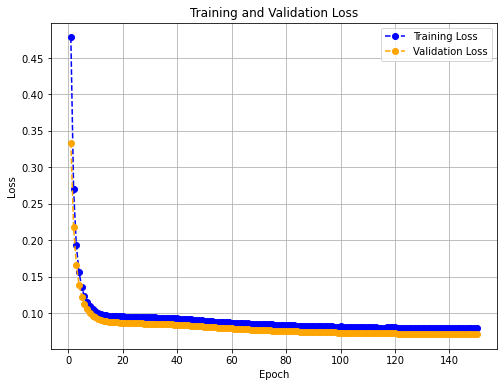

In [155]:
epochs = np.arange(1, ann_val.shape[0] + 1)
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss, label='Training Loss', marker='o', linestyle='--', color='blue')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o', linestyle='--', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [109]:
#Test Model
y_pred = ann_model.predict(X_test)
y_pred = (y_pred>0.5)

272/272 [==============================] - 0s 832us/step


In [110]:
loss, accuracy, auc = ann_model.evaluate(X_test, y_test)

272/272 [==============================] - 0s 1ms/step - loss: 0.0667 - accuracy: 0.9847 - auc: 0.8387


In [111]:
print(f'Loss of ANN : {loss:.4f}')

Loss of ANN : 0.0667


In [112]:
print(f'Accuracy of ANN : {accuracy*100:.4f}')

Accuracy of ANN : 98.4677


In [113]:
cm = confusion_matrix(y_test,y_pred)

In [114]:
cm_df = pd.DataFrame(cm, index=['Actual Neg.', 'Actual Pos.'], columns=['Predicted Neg.', 'Predicted Pos.'])

In [115]:
cm_df

,Predicted Neg.,Predicted Pos.
Actual Neg.,8547,0
Actual Pos.,133,0


Text(0.5, 1.0, 'Confusion Matrix')

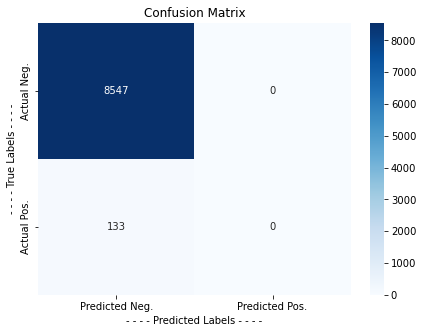

In [116]:
plt.figure(figsize=(7,5))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='d')
# Set the axis labels and title
plt.xlabel('- - - - Predicted Labels - - - -')
plt.ylabel('- - - - True Labels - - - -')
plt.title('Confusion Matrix')

In [51]:
y_pred_1 = ann_model.predict(X_test)

# AUC score for the binary classification problem
auc_score = roc_auc_score(y_test, y_pred_1)

print("AUC Score:", auc_score)

407/407 [==============================] - 0s 820us/step
AUC Score: 0.8385711313956682


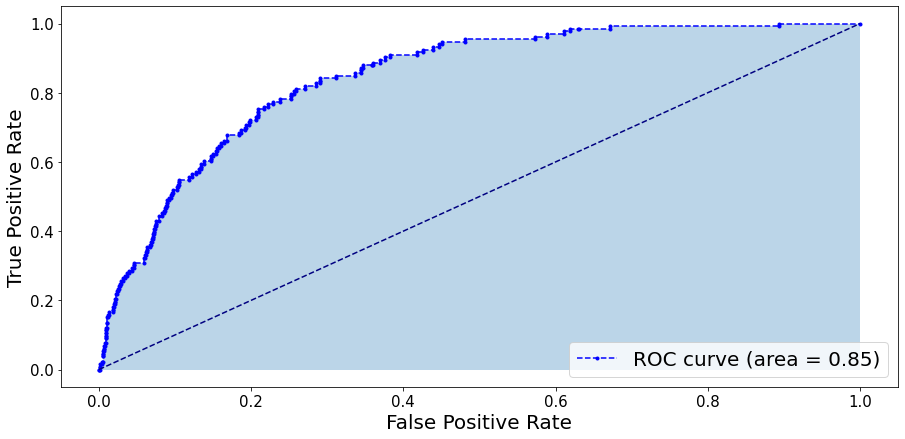

In [49]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(15,7))
plt.plot(fpr, tpr, marker = '.',color='blue', label='ROC curve (area = %0.2f)' % roc_auc, linestyle='--' )
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.fill_between(fpr, tpr, alpha=0.3)
plt.xlabel('False Positive Rate', fontsize = "20")
plt.ylabel('True Positive Rate', fontsize = "20")
plt.legend(loc="lower right", fontsize="20")
plt.xticks(fontsize="15")
plt.yticks(fontsize="15")
plt.show()

In [32]:
roc_ann_data = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})
roc_ann_data.to_csv('roc_data.csv', index=False)

In [17]:
from keras.callbacks import EarlyStopping

In [18]:
early_stopping = EarlyStopping(monitor='val_loss',patience=20)

In [173]:
X_train.shape

(34720, 10)

In [185]:
X_train1.shape

(27776, 10)

In [186]:
X_val.shape

(6944, 10)

In [187]:
y_val.shape

(6944,)

In [19]:
X_train1,X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [20]:
history = ann_model.fit(
    X_train1, y_train1,
    validation_data=(X_val, y_val),
    epochs=150,
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/150
868/868 [==============================] - 2s 2ms/step - loss: 0.3054 - accuracy: 0.9808 - auc: 0.5140 - val_loss: 0.1607 - val_accuracy: 0.9820 - val_auc: 0.4589
Epoch 2/150
868/868 [==============================] - 1s 1ms/step - loss: 0.1312 - accuracy: 0.9811 - auc: 0.4903 - val_loss: 0.1096 - val_accuracy: 0.9820 - val_auc: 0.5000
Epoch 3/150
868/868 [==============================] - 1s 1ms/step - loss: 0.1048 - accuracy: 0.9811 - auc: 0.5059 - val_loss: 0.0966 - val_accuracy: 0.9820 - val_auc: 0.5000
Epoch 4/150
868/868 [==============================] - 1s 1ms/step - loss: 0.0975 - accuracy: 0.9811 - auc: 0.5126 - val_loss: 0.0924 - val_accuracy: 0.9820 - val_auc: 0.5000
Epoch 5/150
868/868 [==============================] - 1s 1ms/step - loss: 0.0950 - accuracy: 0.9811 - auc: 0.5297 - val_loss: 0.0907 - val_accuracy: 0.9820 - val_auc: 0.5378
Epoch 6/150
868/868 [==============================] - 1s 1ms/step - loss: 0.0941 - accuracy: 0.9811 - auc: 0.5246 - val_loss

In [26]:
ann_df = pd.DataFrame(history.history)

In [27]:
ann_df['Epoch'] = range(1, len(ann_df) + 1)

In [29]:
ann_df

,loss,accuracy,auc,val_loss,val_accuracy,val_auc,Epoch
0,0.305424,0.980847,0.514004,0.160698,0.981999,0.458892,1
1,0.131157,0.981099,0.490316,0.109635,0.981999,0.500000,2
2,0.104797,0.981099,0.505879,0.096612,0.981999,0.500000,3
3,0.097457,0.981099,0.512584,0.092385,0.981999,0.500000,4
4,0.094973,0.981099,0.529693,0.090721,0.981999,0.537796,5
...,...,...,...,...,...,...,...
70,0.078052,0.981099,0.840047,0.073671,0.981999,0.847456,71
71,0.077666,0.981099,0.843160,0.073685,0.981999,0.847291,72
72,0.077682,0.981099,0.839478,0.073672,0.981999,0.846475,73
73,0.077851,0.981099,0.839120,0.073685,0.981999,0.847025,74


In [37]:
# Save the DataFrame to an Excel file
ann_df.to_excel(r'Datasets/ANN_Data.xlsx')

In [30]:
train_loss1 = list(ann_df['loss'])
val_loss1 = list(ann_df['val_loss'])

In [32]:
import numpy as np

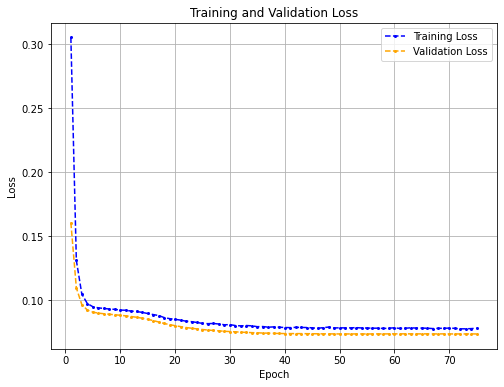

In [36]:
epochs = np.arange(1, ann_df.shape[0] + 1)
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss1, label='Training Loss', marker='o',markersize=2, linestyle='--', color='blue')
plt.plot(epochs, val_loss1, label='Validation Loss', marker='o',markersize=2, linestyle='--', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()